![image](http://www.cao.ie/images/cao.png)

# CAO Points Analysis

* A clear and concise overview of how to load CAO points information from the CAO website into a pandas data frame

* A detailed comparison of CAO points in 2019, 2020, and 2021 using the functionality in pandas.

The purpose of this notebook is to describe how to import data from various different formats, clean the data and make it ready to plot and analysis the data.

The data will be taken from the Irish Central Applications Office (CAO) that processes college applications. It will look at the points requirements of each level 8 course available for the years 2019-2021. http://www.cao.ie/

### Libraries

In [1]:
# Regular expressions
import re

# Package for making HTTP requests
import requests as rq

# Dates and times
import datetime as dt

# Data Frames
import pandas as pd

# For downloading
import urllib.request as urlrq

#Plotting
import matplotlib.pyplot as plt
import seaborn as sns

---
Initially the 2021 data was stored as in and html format and contained only 4 columns, Course code, Course Name the EOS and Mid. The process to import this data is detailed below, however it was not analysed as the data was updated on the website to a csv with more data available.

### 2021 html

Create a file path of where to pull the data from.

In [2]:
# #Fetch the CAO points URL
# resp = rq.get('http://www2.cao.ie/points/l8.php')
# # Have a look
# resp

In [3]:
# #Get the current date and time.
# now = dt.datetime.now()

# # Format as a string
# nowstr = now.strftime('%Y%m%d_%H%M%S')

In [4]:
# #Create a file path for the original data
# pathhtml = 'data/cao2021_' + nowstr + '.html'

The charset encoding had to be changed to read some of the data as:

##### Charset error on server

Technically, server states decoding as:
    ```Content-Type: text/html; charset=iso-8859-1
    ```
However, one line uses \x96 which isn't defined in iso-8859-1.
Therefore, we use the similar decoding standard cp1252, which 
is very similar but includes \x96.

In [5]:
# #The server uses the wrong encoding, fix it.
# original_encoding = resp.encoding
# #Change to cp1252
# resp.encoding = 'cp1252'

Save the file to disk

In [6]:
# #Save the original html file.
# with open(pathhtml, 'w') as f:
#     f.write(resp.text)

In [7]:
# #Compile the regular expression for matching lines.
# re_course = re.compile(r'([A-Z]{2}[0-9]{3})(.*)')
# #   ([0-9]{3})(\*?) *

#### Loop through the lines of the response

To read the data from the html format a csv was created and the code below shows the process of reading the data from the original format to a csv format

---

In [8]:
# # The file path for the csv file.
# path2021 = 'data/cao2021_csv_' + nowstr + '.csv'
    
# #Loop throught the lines of the response content.
# no_lines = 0

# #Open the csv file for writing.
# with open(path2021, 'w') as f:
#     # Write a header row
#     f.write(','.join(['code', 'title','pointsR1','pointsR2']) + '\n')
#     # Loop through lines of the response
#     for line in resp.iter_lines():
#         # Decode the line, using the wrong encoding!
#         dline = line.decode('cp1252')
#         # Match only the lines we want - the ones representing courses.
#         if re_course.fullmatch(dline):
#             #Add one to the lines counter
#             no_lines = no_lines +1          
#             # The course code
#             course_code = dline[:5]
#             # The course title
#             course_title = dline[7:57].strip()
#             # Round one points.
#             course_points = re.split(' +', dline[60:])
#             if len(course_points) != 2:
#                 course_points = course_points[:2]
#              # Join the fields using a comma.
#             linesplit = [course_code, course_title, course_points[0], course_points[1]]
#             # Rejoin the substrings with commas in between
#             f.write(','.join(linesplit)+ '\n')           


# # Print the total number of processed lines.            
# print(f"Total number of lines is {no_lines}.")

The csv was then read in ad a dataframe for processing

In [9]:
# df2021 = pd.read_csv(path2021, encoding='cp1252')

<br>

## Save original data set

Set a time stamp to save a new instance of the data

In [10]:
#Get the current date and time.
now = dt.datetime.now()

# Format as a string
nowstr = now.strftime('%Y%m%d_%H%M%S')

## 2021 Points
https://www.cao.ie/index.php?page=points&p=2021

The new form of the data is much simpler as it can be downloaded straight from a csv and imported to a dataframe.

In [11]:
#2021 csv location
url2021 = 'http://www2.cao.ie/points/CAOPointsCharts2021.xlsx'

In [12]:
# Create a file path for the original data
pathxlsx = 'data/cao2021_' + nowstr + '.xlsx'

In [13]:
#Save original file to disk
urlrq.urlretrieve(url2021, pathxlsx)

('data/cao2021_20220102_185643.xlsx',
 <http.client.HTTPMessage at 0x1285b52e130>)

Import the csv and take only the Level 8 data to store in a dataframe

In [14]:
# Download and parse the excel spredsheet
df2021 = pd.read_excel(url2021, skiprows = 11)
# Only include level 8 data 
df2021 = df2021[df2021['Course Level'] == 8]

In [15]:
# Create a file path for the pandas data
path2021 = 'data/cao2021_' + nowstr + '.csv'

In [16]:
# Save pandas data frame to disk
df2021.to_csv(path2021, encoding='utf-8')

Check the data of the first row

In [17]:
df2021.iloc[0]

CATEGORY (ISCED Description)    Information and Communication Technologies (ICTs)
Course Title                       Software Design for Virtual Reality and Gaming
Course Code                                                                 AL801
R1 Points                                                                     300
R1 Random                                                                     NaN
R2 Points                                                                     NaN
R2 Random                                                                     NaN
EOS Points                                                                    300
EOS Random                                                                    NaN
EOS Midpoints                                                                 359
Course Level                                                                    8
HEI                                               Athlone Institute of Technology
Test/Interview  

Display the dataframe 

In [18]:
df2021

,CATEGORY (ISCED Description),Course Title,Course Code,R1 Points,R1 Random,R2 Points,R2 Random,EOS Points,EOS Random,EOS Midpoints,Course Level,HEI,Test/Interview,AVP,v
29,Information and Communication Technologies (ICTs),Software Design for Virtual Reality and Gaming,AL801,300,NaN,NaN,NaN,300,NaN,359,8,Athlone Institute of Technology,NaN,NaN,NaN
30,Information and Communication Technologies (ICTs),Software Design in Artificial Intelligence for...,AL802,313,NaN,NaN,NaN,313,NaN,381,8,Athlone Institute of Technology,NaN,NaN,NaN
31,Information and Communication Technologies (ICTs),Software Design for Mobile Apps and Connected ...,AL803,350,NaN,NaN,NaN,350,NaN,398,8,Athlone Institute of Technology,NaN,NaN,NaN
32,Information and Communication Technologies (ICTs),Computer Engineering for Network Infrastructure,AL805,321,NaN,NaN,NaN,321,NaN,381,8,Athlone Institute of Technology,NaN,NaN,NaN
33,Architecture and construction,Quantity Surveying,AL810,328,NaN,NaN,NaN,328,NaN,377,8,Athlone Institute of Technology,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1446,Information and Communication Technologies (ICTs),Creative Computing,WD211,270,NaN,NaN,NaN,270,NaN,392,8,Waterford Institute of Technology,NaN,NaN,NaN
1447,Personal services,Recreation and Sport Management,WD212,262,NaN,NaN,NaN,262,NaN,304,8,Waterford Institute of Technology,NaN,NaN,NaN
1448,Engineering and engineering trades,Mechanical and Manufacturing Engineering,WD230,230,NaN,230,NaN,230,NaN,361,8,Waterford Institute of Technology,NaN,avp,NaN
1449,Welfare,Early Childhood Care and Education,WD231,266,NaN,NaN,NaN,266,NaN,366,8,Waterford Institute of Technology,NaN,NaN,NaN


It looks like everything has been imprted successfully and the row count has been confirmed.

## 2020 Points
http://www.cao.ie/index.php?page=points&p=2020

The 2020 data is also stored in a csv so the process is repeated from the 2020 data link.

<br>

#### Save original file

In [19]:
url2020 = 'http://www2.cao.ie/points/CAOPointsCharts2020.xlsx'

In [20]:
# Create a file path for the original data
pathxlsx = 'data/cao2020_' + nowstr + '.xlsx'

In [21]:
#Save original file to disk
urlrq.urlretrieve(url2020, pathxlsx)

('data/cao2020_20220102_185643.xlsx',
 <http.client.HTTPMessage at 0x1285b8067c0>)

<br>

#### Load spreadsheet using pandas

In [22]:
# Download and parse the excel spredsheet
df2020 = pd.read_excel(url2020, skiprows = 10)
# Only include level 8 data
df2020 = df2020[df2020.LEVEL == 8]

Only level 8 values of 1027rows verified in original csv file

In [23]:
# Create a file path for the pandas data
path2020 = 'data/cao2020_' + nowstr + '.csv'

In [24]:
# Save pandas data frame to disk
df2020.to_csv(path2020)

In [25]:
df2020

,CATEGORY (i.e.ISCED description),COURSE TITLE,COURSE CODE2,R1 POINTS,R1 Random *,R2 POINTS,R2 Random*,EOS,EOS Random *,EOS Mid-point,...,avp,v,Column1,Column2,Column3,Column4,Column5,Column6,Column7,Column8
0,Business and administration,International Business,AC120,209,NaN,NaN,NaN,209,NaN,280,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Humanities (except languages),Liberal Arts,AC137,252,NaN,NaN,NaN,252,NaN,270,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Arts,"First Year Art & Design (Common Entry,portfolio)",AD101,#+matric,NaN,NaN,NaN,#+matric,NaN,#+matric,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Arts,Graphic Design and Moving Image Design (portfo...,AD102,#+matric,NaN,NaN,NaN,#+matric,NaN,#+matric,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Arts,Textile & Surface Design and Jewellery & Objec...,AD103,#+matric,NaN,NaN,NaN,#+matric,NaN,#+matric,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,Arts,Arts (options),WD200,AQA,NaN,AQA,NaN,AQA,NaN,336,...,avp,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1460,Information and Communication Technologies (ICTs),Software Systems Development,WD210,279,NaN,NaN,NaN,279,NaN,337,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1461,Information and Communication Technologies (ICTs),Creative Computing,WD211,271,NaN,NaN,NaN,271,NaN,318,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1462,Personal services,Recreation and Sport Management,WD212,270,NaN,NaN,NaN,270,NaN,349,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [26]:
df2021.iloc[241]

CATEGORY (ISCED Description)                  Physical sciences
Course Title                    Physics General Entry (options)
Course Code                                               DC175
R1 Points                                                   400
R1 Random                                                   NaN
R2 Points                                                   NaN
R2 Random                                                   NaN
EOS Points                                                  400
EOS Random                                                  NaN
EOS Midpoints                                               479
Course Level                                                  8
HEI                                      Dublin City University
Test/Interview                                              NaN
AVP                                                         NaN
v                                                           NaN
Name: 350, dtype: object

A random row was selected and spot checked for sanity check to see if produced what was expected from the csv.

<br>

## 2019 Points
http://www.cao.ie/index.php?page=points&p=2019

The 2019 data was stored as a pdf, so a different import methord was required here with more substantial data cleaning process.

##### Steps to reproduce

1. Download original pdf file
2. Open original pdf file in Microsoft Word.
3. Save Microsoft Word's converted PDF in docx format.
4. Re-save Word document for editing.
5. Delete headers and footers.
6. Delete preamble on page 1.
7. Select all and copy.
8. Paste into Notepad ++.
9. Remeove HEI name headings and paste onto each cousre line.
10. Delete blank lines.
11. Delete tab characters at end of college groups.
12. Change all backticks to apostrophes

After the original data was converted and cleaned with the above steps it could be imported from the new csv file

In [27]:
#Import and assign to df2019 dataframe
df2019 = pd.read_csv('data/cao2019_20211204_155130_edited.csv', sep = '\t')

In [28]:
df2019

,HEI,Course Code,INSTITUTION and COURSE,EOS,Mid
0,Athlone Institute of Technology,AL801,Software Design with Virtual Reality and Gaming,304,328.0
1,Athlone Institute of Technology,AL802,Software Design with Cloud Computing,301,306.0
2,Athlone Institute of Technology,AL803,Software Design with Mobile Apps and Connected...,309,337.0
3,Athlone Institute of Technology,AL805,Network Management and Cloud Infrastructure,329,442.0
4,Athlone Institute of Technology,AL810,Quantity Surveying,307,349.0
...,...,...,...,...,...
925,Waterford Institute of Technology,WD200,Arts (options),221,296.0
926,Waterford Institute of Technology,WD210,Software Systems Development,271,329.0
927,Waterford Institute of Technology,WD211,Creative Computing,275,322.0
928,Waterford Institute of Technology,WD212,Recreation and Sport Management,274,311.0


<br>

## Concat and Join
------------

Now that the data has been imported we can take the columns the we required and join them into one dataframe.

Here a new dataframe for courses 2019 was created and the columns for Course code, Course title and College were stored.

In [29]:
#create a new df courses2019
courses2019 = df2019[['Course Code', 'INSTITUTION and COURSE', 'HEI']]
courses2019.columns = ['code', 'title', 'college']
courses2019

,code,title,college
0,AL801,Software Design with Virtual Reality and Gaming,Athlone Institute of Technology
1,AL802,Software Design with Cloud Computing,Athlone Institute of Technology
2,AL803,Software Design with Mobile Apps and Connected...,Athlone Institute of Technology
3,AL805,Network Management and Cloud Infrastructure,Athlone Institute of Technology
4,AL810,Quantity Surveying,Athlone Institute of Technology
...,...,...,...
925,WD200,Arts (options),Waterford Institute of Technology
926,WD210,Software Systems Development,Waterford Institute of Technology
927,WD211,Creative Computing,Waterford Institute of Technology
928,WD212,Recreation and Sport Management,Waterford Institute of Technology


The same was done for 2020, with the same column headers

In [30]:
courses2020 = df2020[['COURSE CODE2', 'COURSE TITLE', 'HEI']]
courses2020.columns = ['code', 'title','college']
courses2020

,code,title,college
0,AC120,International Business,American College
1,AC137,Liberal Arts,American College
2,AD101,"First Year Art & Design (Common Entry,portfolio)",National College of Art and Design
3,AD102,Graphic Design and Moving Image Design (portfo...,National College of Art and Design
4,AD103,Textile & Surface Design and Jewellery & Objec...,National College of Art and Design
...,...,...,...
1455,WD200,Arts (options),Waterford Institute of Technology
1460,WD210,Software Systems Development,Waterford Institute of Technology
1461,WD211,Creative Computing,Waterford Institute of Technology
1462,WD212,Recreation and Sport Management,Waterford Institute of Technology


The same was done for 2021, with the same column headers

In [31]:
courses2021 = df2021[['Course Code', 'Course Title', 'HEI']]
courses2021.columns = ['code', 'title','college']
courses2021

,code,title,college
29,AL801,Software Design for Virtual Reality and Gaming,Athlone Institute of Technology
30,AL802,Software Design in Artificial Intelligence for...,Athlone Institute of Technology
31,AL803,Software Design for Mobile Apps and Connected ...,Athlone Institute of Technology
32,AL805,Computer Engineering for Network Infrastructure,Athlone Institute of Technology
33,AL810,Quantity Surveying,Athlone Institute of Technology
...,...,...,...
1446,WD211,Creative Computing,Waterford Institute of Technology
1447,WD212,Recreation and Sport Management,Waterford Institute of Technology
1448,WD230,Mechanical and Manufacturing Engineering,Waterford Institute of Technology
1449,WD231,Early Childhood Care and Education,Waterford Institute of Technology


We can now concatenate the 3 new dataframes into one, the rows counts were checked and can confirm all rows were transfered into the new dataframe.

In [32]:
#Concat to new allcourses df
allcourses = pd.concat([courses2021, courses2020, courses2019], ignore_index=True)
allcourses

,code,title,college
0,AL801,Software Design for Virtual Reality and Gaming,Athlone Institute of Technology
1,AL802,Software Design in Artificial Intelligence for...,Athlone Institute of Technology
2,AL803,Software Design for Mobile Apps and Connected ...,Athlone Institute of Technology
3,AL805,Computer Engineering for Network Infrastructure,Athlone Institute of Technology
4,AL810,Quantity Surveying,Athlone Institute of Technology
...,...,...,...
2986,WD200,Arts (options),Waterford Institute of Technology
2987,WD210,Software Systems Development,Waterford Institute of Technology
2988,WD211,Creative Computing,Waterford Institute of Technology
2989,WD212,Recreation and Sport Management,Waterford Institute of Technology


Sort by course code

In [33]:
#sort by course code
allcourses.sort_values('code')

,code,title,college
1034,AC120,International Business,American College
2229,AC120,International Business,American College
175,AC120,International Business,American College
1035,AC137,Liberal Arts,American College
2230,AC137,Liberal Arts,American College
...,...,...,...
2990,WD230,Mechanical and Manufacturing Engineering,Waterford Institute of Technology
2060,WD230,Mechanical and Manufacturing Engineering,Waterford Institute of Technology
1031,WD230,Mechanical and Manufacturing Engineering,Waterford Institute of Technology
1032,WD231,Early Childhood Care and Education,Waterford Institute of Technology


Check for duplicate entries

In [34]:
#Finds all extra copies of duplicated rows.
allcourses[allcourses.duplicated()]

,code,title,college
1034,AC120,International Business,American College
1035,AC137,Liberal Arts,American College
1037,AD102,Graphic Design and Moving Image Design (portfo...,National College of Art and Design
1040,AD204,Fine Art (portfolio),National College of Art and Design
1041,AD211,Fashion Design (portfolio),National College of Art and Design
...,...,...,...
2986,WD200,Arts (options),Waterford Institute of Technology
2987,WD210,Software Systems Development,Waterford Institute of Technology
2988,WD211,Creative Computing,Waterford Institute of Technology
2989,WD212,Recreation and Sport Management,Waterford Institute of Technology


Remove all rows with duplicate entries from multiple years

In [35]:
#Returns a copy of the data frame with all duplicates removed.
allcourses.drop_duplicates()

,code,title,college
0,AL801,Software Design for Virtual Reality and Gaming,Athlone Institute of Technology
1,AL802,Software Design in Artificial Intelligence for...,Athlone Institute of Technology
2,AL803,Software Design for Mobile Apps and Connected ...,Athlone Institute of Technology
3,AL805,Computer Engineering for Network Infrastructure,Athlone Institute of Technology
4,AL810,Quantity Surveying,Athlone Institute of Technology
...,...,...,...
2929,TL801,Animation Visual Effects and Motion Design,"Institute of Technology, Tralee"
2930,TL802,"TV, Radio and New Media","Institute of Technology, Tralee"
2931,TL803,Music Technology,"Institute of Technology, Tralee"
2934,TL812,Computing with Digital Media,"Institute of Technology, Tralee"


Finds all extra copies of duplicated rows.

In [36]:
#Finds all extra copies of duplicated rows.
allcourses[allcourses.duplicated(subset=['code'])]

,code,title,college
1034,AC120,International Business,American College
1035,AC137,Liberal Arts,American College
1036,AD101,"First Year Art & Design (Common Entry,portfolio)",National College of Art and Design
1037,AD102,Graphic Design and Moving Image Design (portfo...,National College of Art and Design
1038,AD103,Textile & Surface Design and Jewellery & Objec...,National College of Art and Design
...,...,...,...
2986,WD200,Arts (options),Waterford Institute of Technology
2987,WD210,Software Systems Development,Waterford Institute of Technology
2988,WD211,Creative Computing,Waterford Institute of Technology
2989,WD212,Recreation and Sport Management,Waterford Institute of Technology


Returns a copy of the data frame with all duplicates removed - based only on code

In [37]:
#Returns a copy of the data frame with all duplicates removed - based only on code
allcourses.drop_duplicates(subset=['code'], inplace=True, ignore_index=True)

In [38]:
allcourses

,code,title,college
0,AL801,Software Design for Virtual Reality and Gaming,Athlone Institute of Technology
1,AL802,Software Design in Artificial Intelligence for...,Athlone Institute of Technology
2,AL803,Software Design for Mobile Apps and Connected ...,Athlone Institute of Technology
3,AL805,Computer Engineering for Network Infrastructure,Athlone Institute of Technology
4,AL810,Quantity Surveying,Athlone Institute of Technology
...,...,...,...
1227,SG441,Environmental Science,"Institute of Technology, Sligo"
1228,SG446,Applied Archaeology,"Institute of Technology, Sligo"
1229,TL803,Music Technology,"Institute of Technology, Tralee"
1230,TL812,Computing with Digital Media,"Institute of Technology, Tralee"


We are now left with 1232 rows of all course offered over the 3 years 2019-2021 in the dataframe allcourses.

<br>

## Join to the points
--------

Now that we have the base of the dataframe we can add the data columns from the original dataframes to the allcourses df. Here we create a new df for 2021 data with the columns for round 1, round 2, EOS and EOS Midpoints.

In [39]:
df2021_r1 = df2021[['Course Code', 'Course Title', 'R1 Points','R2 Points ', 'EOS Points', 'EOS Midpoints']]
df2021_r1.columns = ['code', 'title','points_r1_2021','points_r2_2021', 'points_EOS_2021', 'points_Mid_2021']
df2021_r1

,code,title,points_r1_2021,points_r2_2021,points_EOS_2021,points_Mid_2021
29,AL801,Software Design for Virtual Reality and Gaming,300,NaN,300,359
30,AL802,Software Design in Artificial Intelligence for...,313,NaN,313,381
31,AL803,Software Design for Mobile Apps and Connected ...,350,NaN,350,398
32,AL805,Computer Engineering for Network Infrastructure,321,NaN,321,381
33,AL810,Quantity Surveying,328,NaN,328,377
...,...,...,...,...,...,...
1446,WD211,Creative Computing,270,NaN,270,392
1447,WD212,Recreation and Sport Management,262,NaN,262,304
1448,WD230,Mechanical and Manufacturing Engineering,230,230,230,361
1449,WD231,Early Childhood Care and Education,266,NaN,266,366


 Set the index to the code column for the new df

In [40]:
# Set the index to the code column
df2021_r1.set_index('code', inplace=True)
df2021_r1

,title,points_r1_2021,points_r2_2021,points_EOS_2021,points_Mid_2021
code,,,,,
AL801,Software Design for Virtual Reality and Gaming,300,NaN,300,359
AL802,Software Design in Artificial Intelligence for...,313,NaN,313,381
AL803,Software Design for Mobile Apps and Connected ...,350,NaN,350,398
AL805,Computer Engineering for Network Infrastructure,321,NaN,321,381
AL810,Quantity Surveying,328,NaN,328,377
...,...,...,...,...,...
WD211,Creative Computing,270,NaN,270,392
WD212,Recreation and Sport Management,262,NaN,262,304
WD230,Mechanical and Manufacturing Engineering,230,230,230,361


Do the same for the 2020 data, with the same columns.

In [41]:
df2020_r1 = df2020[['COURSE CODE2', 'R1 POINTS','R2 POINTS', 'EOS','EOS Mid-point']]
df2020_r1.columns = ['code', 'points_r1_2020','points_r2_2020', 'points_EOS_2020', 'points_Mid_2020']
df2020_r1

,code,points_r1_2020,points_r2_2020,points_EOS_2020,points_Mid_2020
0,AC120,209,NaN,209,280
1,AC137,252,NaN,252,270
2,AD101,#+matric,NaN,#+matric,#+matric
3,AD102,#+matric,NaN,#+matric,#+matric
4,AD103,#+matric,NaN,#+matric,#+matric
...,...,...,...,...,...
1455,WD200,AQA,AQA,AQA,336
1460,WD210,279,NaN,279,337
1461,WD211,271,NaN,271,318
1462,WD212,270,NaN,270,349


In [42]:
# Set the index to the code column
df2020_r1.set_index('code', inplace=True)
df2020_r1

,points_r1_2020,points_r2_2020,points_EOS_2020,points_Mid_2020
code,,,,
AC120,209,NaN,209,280
AC137,252,NaN,252,270
AD101,#+matric,NaN,#+matric,#+matric
AD102,#+matric,NaN,#+matric,#+matric
AD103,#+matric,NaN,#+matric,#+matric
...,...,...,...,...
WD200,AQA,AQA,AQA,336
WD210,279,NaN,279,337
WD211,271,NaN,271,318


And for the 2019 we can do the same with the two available data columns.

In [43]:
df2019_r1 = df2019[['Course Code', 'EOS', 'Mid']]
df2019_r1.columns = ['code', 'points_EOS_2019', 'points_Mid_2019']
df2019_r1

,code,points_EOS_2019,points_Mid_2019
0,AL801,304,328.0
1,AL802,301,306.0
2,AL803,309,337.0
3,AL805,329,442.0
4,AL810,307,349.0
...,...,...,...
925,WD200,221,296.0
926,WD210,271,329.0
927,WD211,275,322.0
928,WD212,274,311.0


In [44]:
# Set the index to the code column
df2019_r1.set_index('code', inplace=True)
df2019_r1

,points_EOS_2019,points_Mid_2019
code,,
AL801,304,328.0
AL802,301,306.0
AL803,309,337.0
AL805,329,442.0
AL810,307,349.0
...,...,...
WD200,221,296.0
WD210,271,329.0
WD211,275,322.0


Now we set the index to code for the allcourses df and can start joining the data.

In [45]:
# Set the index to the code column
allcourses.set_index('code', inplace=True)

In [46]:
#join round 1 2021 data
allcourses = allcourses.join(df2021_r1[['points_r1_2021']])
allcourses

,title,college,points_r1_2021
code,,,
AL801,Software Design for Virtual Reality and Gaming,Athlone Institute of Technology,300
AL802,Software Design in Artificial Intelligence for...,Athlone Institute of Technology,313
AL803,Software Design for Mobile Apps and Connected ...,Athlone Institute of Technology,350
AL805,Computer Engineering for Network Infrastructure,Athlone Institute of Technology,321
AL810,Quantity Surveying,Athlone Institute of Technology,328
...,...,...,...
SG441,Environmental Science,"Institute of Technology, Sligo",NaN
SG446,Applied Archaeology,"Institute of Technology, Sligo",NaN
TL803,Music Technology,"Institute of Technology, Tralee",NaN


In [47]:
# Join round 1 2020 data to allcourses
allcourses = allcourses.join(df2020_r1[['points_r1_2020']])

In [48]:
# Join round 2 2021 data to allcourses
allcourses = allcourses.join(df2021_r1[['points_r2_2021']])

In [49]:
# Join round 2 2020 data to allcourses
allcourses = allcourses.join(df2020_r1[['points_r2_2020']])

In [50]:
# Join EOS 2021 data to allcourses
allcourses = allcourses.join(df2021_r1[['points_EOS_2021']])

In [51]:
# Join EOS 2020 data to allcourses
allcourses = allcourses.join(df2020_r1[['points_EOS_2020']])

In [52]:
# Join EOS 2019 data to allcourses
allcourses = allcourses.join(df2019_r1[['points_EOS_2019']])

In [53]:
# Join Mid 2021 data to allcourses
allcourses = allcourses.join(df2021_r1[['points_Mid_2021']])

In [54]:
# Join Mid 2020 data to allcourses
allcourses = allcourses.join(df2020_r1[['points_Mid_2020']])

In [55]:
# Join Mid 2019 data to allcourses
allcourses = allcourses.join(df2019_r1[['points_Mid_2019']])
allcourses

,title,college,points_r1_2021,points_r1_2020,points_r2_2021,points_r2_2020,points_EOS_2021,points_EOS_2020,points_EOS_2019,points_Mid_2021,points_Mid_2020,points_Mid_2019
code,,,,,,,,,,,,
AL801,Software Design for Virtual Reality and Gaming,Athlone Institute of Technology,300,303,NaN,NaN,300,303,304,359,367,328.0
AL802,Software Design in Artificial Intelligence for...,Athlone Institute of Technology,313,332,NaN,NaN,313,332,301,381,382,306.0
AL803,Software Design for Mobile Apps and Connected ...,Athlone Institute of Technology,350,337,NaN,NaN,350,337,309,398,360,337.0
AL805,Computer Engineering for Network Infrastructure,Athlone Institute of Technology,321,333,NaN,NaN,321,333,329,381,360,442.0
AL810,Quantity Surveying,Athlone Institute of Technology,328,319,NaN,NaN,328,326,307,377,352,349.0
...,...,...,...,...,...,...,...,...,...,...,...,...
SG441,Environmental Science,"Institute of Technology, Sligo",NaN,NaN,NaN,NaN,NaN,NaN,297,NaN,NaN,358.0
SG446,Applied Archaeology,"Institute of Technology, Sligo",NaN,NaN,NaN,NaN,NaN,NaN,289,NaN,NaN,290.0
TL803,Music Technology,"Institute of Technology, Tralee",NaN,NaN,NaN,NaN,NaN,NaN,264,NaN,NaN,288.0


And this is the final dataframe with all the data for the 3 years

Checking the datatypes, all the values are objects so will need to be converted to a numeric type for plotting.

In [56]:
allcourses.dtypes

title               object
college             object
points_r1_2021      object
points_r1_2020      object
points_r2_2021      object
points_r2_2020      object
points_EOS_2021     object
points_EOS_2020     object
points_EOS_2019     object
points_Mid_2021     object
points_Mid_2020     object
points_Mid_2019    float64
dtype: object

Create a new df to convert the datatypes and drop all instances of non numeric data. 

Within the data the are # and * values referring to modules that require extra entry requirements like an interview or a portfolio. As we are only concerned with the points for analysis we will keep that data in the allcourses df and create a new df with the * and # figures removed.

In [57]:
#create a new df with just the points values
caoPoints = allcourses[['points_r1_2021','points_r1_2020','points_r2_2021', 'points_r2_2020',
                        'points_EOS_2021', 'points_EOS_2020','points_EOS_2019',
                        'points_Mid_2021','points_Mid_2020','points_Mid_2019']].replace('[A-Z.#*+a-z]', '', regex = True)

In [58]:
#check data types
caoPoints.dtypes

points_r1_2021      object
points_r1_2020      object
points_r2_2021      object
points_r2_2020      object
points_EOS_2021     object
points_EOS_2020     object
points_EOS_2019     object
points_Mid_2021     object
points_Mid_2020     object
points_Mid_2019    float64
dtype: object

In [59]:
#View the new caoPoints df, 
#we can set the display rows column to 1232 for scan all the df
pd.set_option('display.max_rows',12)
caoPoints

,points_r1_2021,points_r1_2020,points_r2_2021,points_r2_2020,points_EOS_2021,points_EOS_2020,points_EOS_2019,points_Mid_2021,points_Mid_2020,points_Mid_2019
code,,,,,,,,,,
AL801,300,303,NaN,NaN,300,303,304,359,367,328.0
AL802,313,332,NaN,NaN,313,332,301,381,382,306.0
AL803,350,337,NaN,NaN,350,337,309,398,360,337.0
AL805,321,333,NaN,NaN,321,333,329,381,360,442.0
AL810,328,319,NaN,NaN,328,326,307,377,352,349.0
...,...,...,...,...,...,...,...,...,...,...
SG441,NaN,NaN,NaN,NaN,NaN,NaN,297,NaN,NaN,358.0
SG446,NaN,NaN,NaN,NaN,NaN,NaN,289,NaN,NaN,290.0
TL803,NaN,NaN,NaN,NaN,NaN,NaN,264,NaN,NaN,288.0


Now to convert all the data to numeric, coerce forces the conversion and ignores errors.

In [60]:
#convert object to float
caoPoints['points_r1_2021'] = pd.to_numeric(caoPoints['points_r1_2021'],errors = 'coerce')
caoPoints['points_r1_2020'] = pd.to_numeric(caoPoints['points_r1_2020'],errors = 'coerce')
caoPoints['points_r2_2021'] = pd.to_numeric(caoPoints['points_r2_2021'],errors = 'coerce')
caoPoints['points_r2_2020'] = pd.to_numeric(caoPoints['points_r2_2020'],errors = 'coerce')
caoPoints['points_EOS_2021'] = pd.to_numeric(caoPoints['points_EOS_2021'],errors = 'coerce')
caoPoints['points_EOS_2020'] = pd.to_numeric(caoPoints['points_EOS_2020'],errors = 'coerce')
caoPoints['points_EOS_2019'] = pd.to_numeric(caoPoints['points_EOS_2019'],errors = 'coerce')
caoPoints['points_Mid_2021'] = pd.to_numeric(caoPoints['points_Mid_2021'],errors = 'coerce')
caoPoints['points_Mid_2020'] = pd.to_numeric(caoPoints['points_Mid_2020'],errors = 'coerce')
caoPoints['points_Mid_2019'] = pd.to_numeric(caoPoints['points_Mid_2019'],errors = 'coerce')

In [61]:
#check the new data types
caoPoints.dtypes

points_r1_2021     float64
points_r1_2020     float64
points_r2_2021     float64
points_r2_2020     float64
points_EOS_2021    float64
points_EOS_2020    float64
points_EOS_2019    float64
points_Mid_2021    float64
points_Mid_2020    float64
points_Mid_2019    float64
dtype: object

Now to rejoin the non numeric columns to the caoPoints df.

In [62]:
caoPoints = caoPoints.join(allcourses['title'])

In [63]:
caoPoints = caoPoints.join(allcourses['college'])

In [64]:
caoPoints.dtypes

points_r1_2021     float64
points_r1_2020     float64
points_r2_2021     float64
points_r2_2020     float64
points_EOS_2021    float64
points_EOS_2020    float64
points_EOS_2019    float64
points_Mid_2021    float64
points_Mid_2020    float64
points_Mid_2019    float64
title               object
college             object
dtype: object

In [65]:
caoPoints

,points_r1_2021,points_r1_2020,points_r2_2021,points_r2_2020,points_EOS_2021,points_EOS_2020,points_EOS_2019,points_Mid_2021,points_Mid_2020,points_Mid_2019,title,college
code,,,,,,,,,,,,
AL801,300.0,303.0,NaN,NaN,300.0,303.0,304.0,359.0,367.0,328.0,Software Design for Virtual Reality and Gaming,Athlone Institute of Technology
AL802,313.0,332.0,NaN,NaN,313.0,332.0,301.0,381.0,382.0,306.0,Software Design in Artificial Intelligence for...,Athlone Institute of Technology
AL803,350.0,337.0,NaN,NaN,350.0,337.0,309.0,398.0,360.0,337.0,Software Design for Mobile Apps and Connected ...,Athlone Institute of Technology
AL805,321.0,333.0,NaN,NaN,321.0,333.0,329.0,381.0,360.0,442.0,Computer Engineering for Network Infrastructure,Athlone Institute of Technology
AL810,328.0,319.0,NaN,NaN,328.0,326.0,307.0,377.0,352.0,349.0,Quantity Surveying,Athlone Institute of Technology
...,...,...,...,...,...,...,...,...,...,...,...,...
SG441,NaN,NaN,NaN,NaN,NaN,NaN,297.0,NaN,NaN,358.0,Environmental Science,"Institute of Technology, Sligo"
SG446,NaN,NaN,NaN,NaN,NaN,NaN,289.0,NaN,NaN,290.0,Applied Archaeology,"Institute of Technology, Sligo"
TL803,NaN,NaN,NaN,NaN,NaN,NaN,264.0,NaN,NaN,288.0,Music Technology,"Institute of Technology, Tralee"


We are now ready for the analysis

---

## Analysis

In [66]:
# Change default style of matplot lib pyplot charts.
plt.style.use('seaborn')

# Change default matplotlib pyplot figure size and bins.
plt.rcParams['figure.figsize'] = (10,10)

In [67]:
caoPoints.describe()

,points_r1_2021,points_r1_2020,points_r2_2021,points_r2_2020,points_EOS_2021,points_EOS_2020,points_EOS_2019,points_Mid_2021,points_Mid_2020,points_Mid_2019
count,1001.000000,989.000000,260.000000,209.000000,1006.000000,993.000000,906.000000,1014.000000,988.000000,915.000000
mean,419.503497,394.300303,417.980769,394.521531,414.464215,391.799597,374.951435,465.928994,448.198381,426.414208
std,133.020593,126.135161,148.367889,127.579578,133.636427,128.446837,123.902697,132.284315,129.237735,133.142255
min,57.000000,55.000000,60.000000,184.000000,57.000000,55.000000,55.000000,0.000000,57.000000,57.000000
25%,307.000000,301.000000,294.000000,282.000000,304.250000,300.000000,290.000000,379.000000,362.000000,339.000000
50%,412.000000,370.000000,423.500000,402.000000,409.000000,368.000000,348.000000,455.000000,426.500000,397.000000
75%,511.000000,476.000000,523.000000,498.000000,509.750000,474.000000,440.000000,541.000000,510.000000,477.500000
max,1028.000000,1088.000000,956.000000,768.000000,1028.000000,1088.000000,979.000000,1141.000000,1088.000000,1073.000000


In [68]:
#count of data per column
caoPoints.count()

points_r1_2021     1001
points_r1_2020      989
points_r2_2021      260
points_r2_2020      209
points_EOS_2021    1006
points_EOS_2020     993
points_EOS_2019     906
points_Mid_2021    1014
points_Mid_2020     988
points_Mid_2019     915
title              1232
college            1232
dtype: int64

We can see the ammount of courses offered by each instituton over the 3 year period, with Trinity College Dublin and Technological University Dublin offering by far the most courses.

In [69]:
pd.set_option('display.max_rows',38)
countColleges = caoPoints["college"].value_counts()
countColleges

Trinity College Dublin                                   146
Technological University Dublin                          120
Dublin City University                                    74
National University of Ireland, Galway                    73
Technological University Dublin City Campus               69
University College Cork (NUI)                             67
Limerick Institute of Technology                          54
Galway-Mayo Institute of Technology                       53
University of Limerick                                    46
Cork Institute of Technology                              46
Institute of Technology, Sligo                            43
University College Dublin (NUI)                           42
Waterford Institute of Technology                         39
Maynooth University                                       37
Institute of Technology, Carlow                           36
Athlone Institute of Technology                           32
Dundalk Institute of Tec

#### Round 1 2020-2021

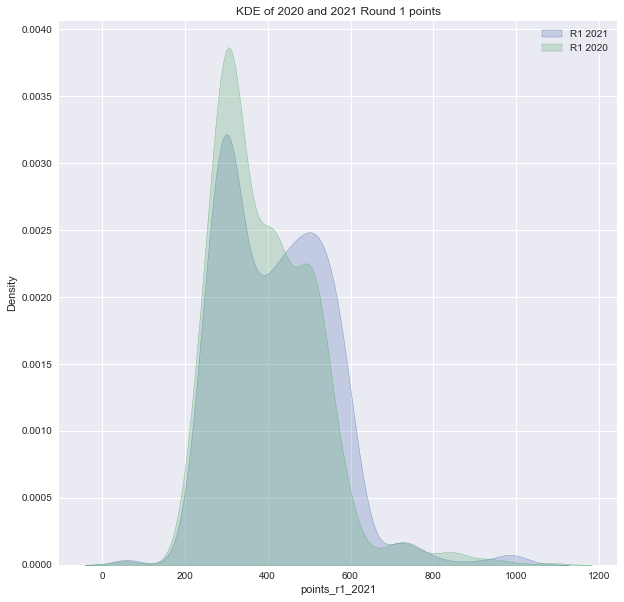

In [70]:
sns.kdeplot(caoPoints['points_r1_2021'], label='R1 2021',shade=True)
sns.kdeplot(caoPoints['points_r1_2020'], label='R1 2020',shade=True)

plt.title("KDE of 2020 and 2021 Round 1 points")
plt.legend()
plt.show()

Comparing the distributions of Round 1 points from 2021 - 2020 we can see the overall values have risen in 2021 and the peak has flattened from around the 300 points value.

#### Round 2 2020-2021

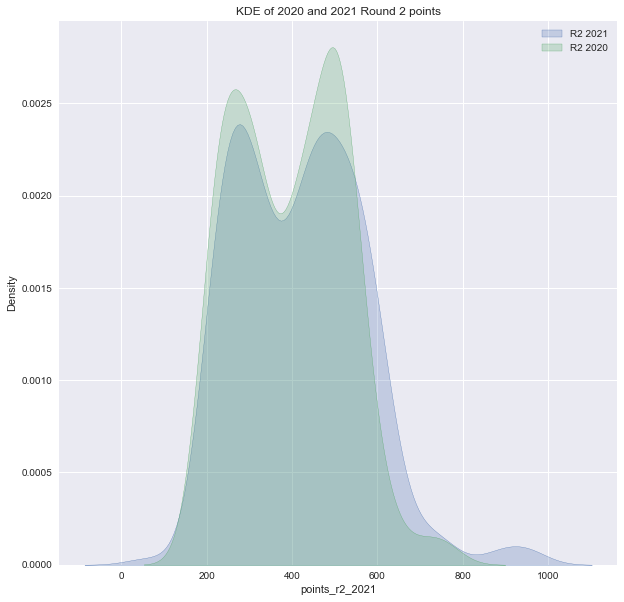

In [71]:
sns.kdeplot(caoPoints['points_r2_2021'], label='R2 2021',shade=True)
sns.kdeplot(caoPoints['points_r2_2020'], label='R2 2020',shade=True)

plt.title("KDE of 2020 and 2021 Round 2 points")
plt.legend()
plt.show()

With the round 2 data there does appear to be a rise in points in 2021 and lower peaks, there is also a rise in values over 800 points suggesting more emphasis on portfolios that consider more points then the 625 max from Leaving Cert results.

#### EOS 2020-2021

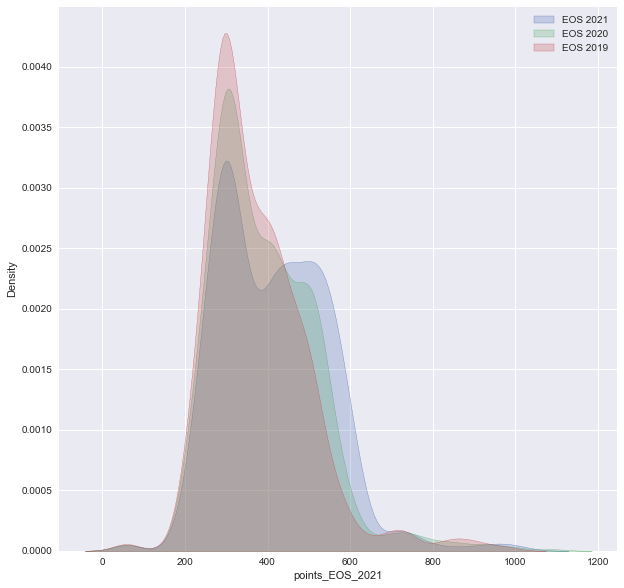

In [72]:
sns.kdeplot(caoPoints['points_EOS_2021'], label='EOS 2021',shade=True)
sns.kdeplot(caoPoints['points_EOS_2020'], label='EOS 2020',shade=True)
sns.kdeplot(caoPoints['points_EOS_2019'], label='EOS 2019',shade=True)
plt.legend()
plt.show()

#### Mid 2020-2021

There is a clear trend of points increasing over the 3 years.

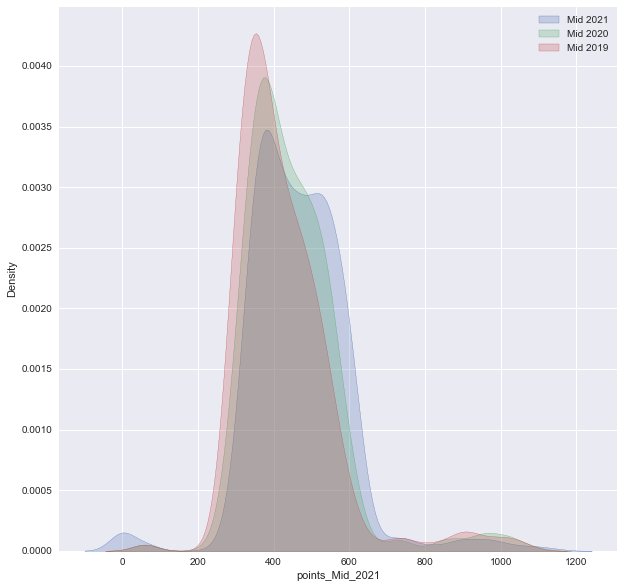

In [73]:
sns.kdeplot(caoPoints['points_Mid_2021'], label='Mid 2021',shade=True)
sns.kdeplot(caoPoints['points_Mid_2020'], label='Mid 2020',shade=True)
sns.kdeplot(caoPoints['points_Mid_2019'], label='Mid 2019',shade=True)
plt.legend()
plt.show()

#### Differences

Now that we can see a clear trend in increasing points over the years it will be interesting to break this down further. Here we can create 8 new columns in the dataframe subtracting points of earlier years and look at the point differential.

In [74]:
#Create new colums of point differences
caoPoints['R1_21-20'] = caoPoints['points_r1_2021'] - caoPoints['points_r1_2020']
caoPoints['R2_21-20'] = caoPoints['points_r2_2021'] - caoPoints['points_r2_2020']
caoPoints['EOS_21-20'] = caoPoints['points_EOS_2021'] - caoPoints['points_EOS_2020']
caoPoints['EOS_21-19'] = caoPoints['points_EOS_2021'] - caoPoints['points_EOS_2019']
caoPoints['EOS_20-19'] = caoPoints['points_EOS_2020'] - caoPoints['points_EOS_2019']
caoPoints['Mid_21-20'] = caoPoints['points_Mid_2021'] - caoPoints['points_Mid_2020']
caoPoints['Mid_21-19'] = caoPoints['points_Mid_2021'] - caoPoints['points_Mid_2019']
caoPoints['Mid_20-19'] = caoPoints['points_Mid_2020'] - caoPoints['points_Mid_2019']

caoPoints

,points_r1_2021,points_r1_2020,points_r2_2021,points_r2_2020,points_EOS_2021,points_EOS_2020,points_EOS_2019,points_Mid_2021,points_Mid_2020,points_Mid_2019,title,college,R1_21-20,R2_21-20,EOS_21-20,EOS_21-19,EOS_20-19,Mid_21-20,Mid_21-19,Mid_20-19
code,,,,,,,,,,,,,,,,,,,,
AL801,300.0,303.0,NaN,NaN,300.0,303.0,304.0,359.0,367.0,328.0,Software Design for Virtual Reality and Gaming,Athlone Institute of Technology,-3.0,NaN,-3.0,-4.0,-1.0,-8.0,31.0,39.0
AL802,313.0,332.0,NaN,NaN,313.0,332.0,301.0,381.0,382.0,306.0,Software Design in Artificial Intelligence for...,Athlone Institute of Technology,-19.0,NaN,-19.0,12.0,31.0,-1.0,75.0,76.0
AL803,350.0,337.0,NaN,NaN,350.0,337.0,309.0,398.0,360.0,337.0,Software Design for Mobile Apps and Connected ...,Athlone Institute of Technology,13.0,NaN,13.0,41.0,28.0,38.0,61.0,23.0
AL805,321.0,333.0,NaN,NaN,321.0,333.0,329.0,381.0,360.0,442.0,Computer Engineering for Network Infrastructure,Athlone Institute of Technology,-12.0,NaN,-12.0,-8.0,4.0,21.0,-61.0,-82.0
AL810,328.0,319.0,NaN,NaN,328.0,326.0,307.0,377.0,352.0,349.0,Quantity Surveying,Athlone Institute of Technology,9.0,NaN,2.0,21.0,19.0,25.0,28.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SG441,NaN,NaN,NaN,NaN,NaN,NaN,297.0,NaN,NaN,358.0,Environmental Science,"Institute of Technology, Sligo",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SG446,NaN,NaN,NaN,NaN,NaN,NaN,289.0,NaN,NaN,290.0,Applied Archaeology,"Institute of Technology, Sligo",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
TL803,NaN,NaN,NaN,NaN,NaN,NaN,264.0,NaN,NaN,288.0,Music Technology,"Institute of Technology, Tralee",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


To visualize these differences we can plot the points differences and group by college to see which colleges had the greatest change in points.

#### Round 1 and 2 differences per year by college

[]

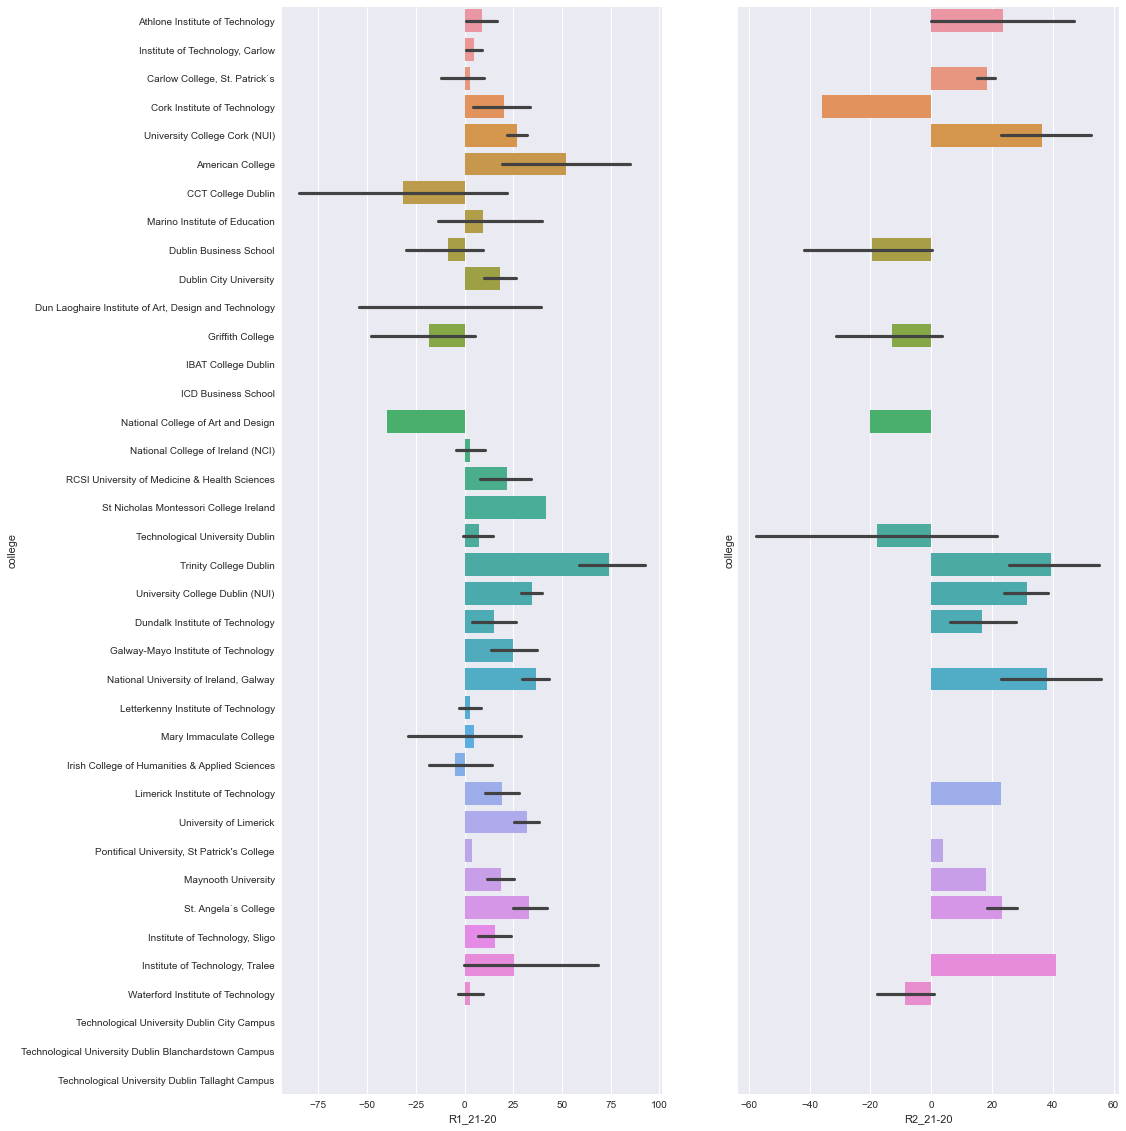

In [80]:
# Change default figure size.
plt.rcParams['figure.figsize'] = (15,20)
fig, axes = plt.subplots(1,2)

ax1 = sns.barplot(x = caoPoints["R1_21-20"], y = caoPoints["college"], ax=axes[0])
ax2 = sns.barplot(x = caoPoints["R2_21-20"], y = caoPoints["college"], ax=axes[1])
ax2.get_yaxis().set_ticks([])

#### EOS points differences per year by college

[]

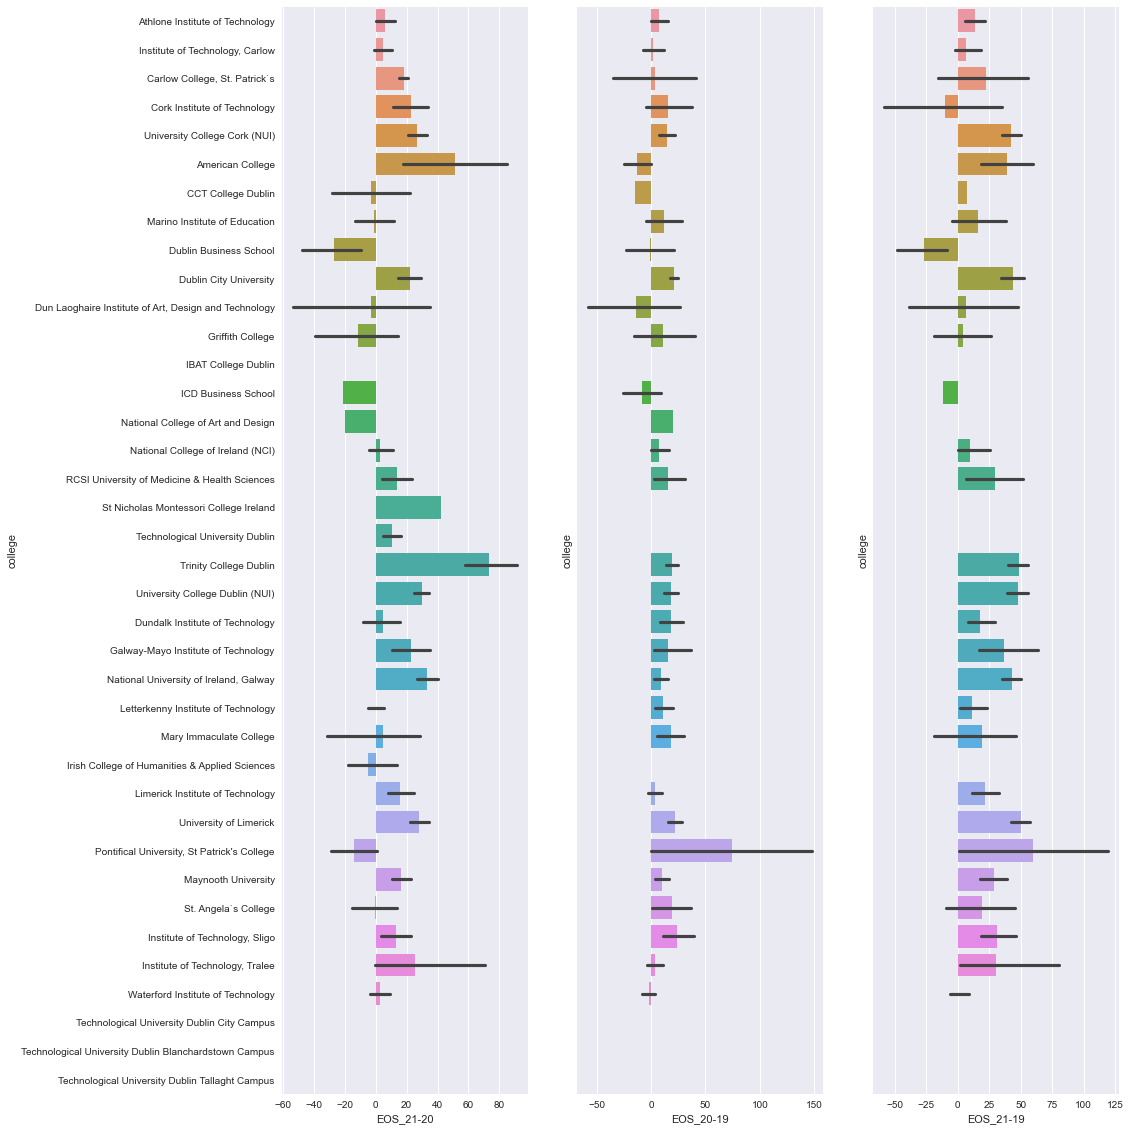

In [76]:
fig, axes = plt.subplots(1,3)

ax1 = sns.barplot(x = caoPoints["EOS_21-20"], y = caoPoints["college"], ax=axes[0])
ax2 = sns.barplot(x = caoPoints["EOS_20-19"], y = caoPoints["college"], ax=axes[1])
ax2.get_yaxis().set_ticks([])
ax3 = sns.barplot(x = caoPoints["EOS_21-19"], y = caoPoints["college"], ax=axes[2])
ax3.get_yaxis().set_ticks([])

#### Mid point differences per year by college

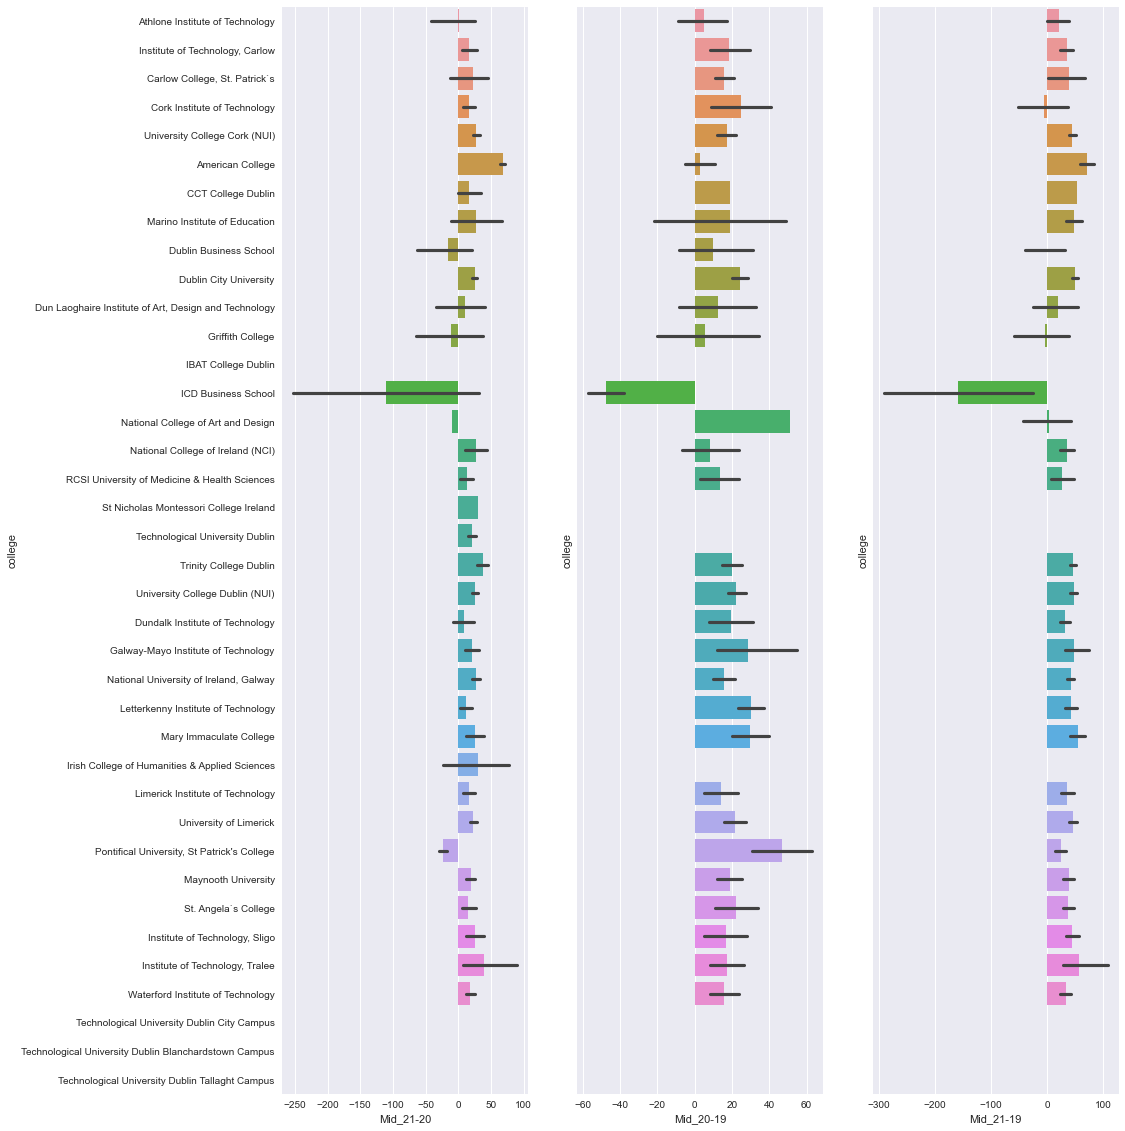

In [77]:
fig, axes = plt.subplots(1,3)

ax1 = sns.barplot(x = caoPoints["Mid_21-20"], y = caoPoints["college"], ax=axes[0])
ax2 = sns.barplot(x = caoPoints["Mid_20-19"], y = caoPoints["college"], ax=axes[1])
ax2.get_yaxis().set_ticks([])
ax3 = sns.barplot(x = caoPoints["Mid_21-19"], y = caoPoints["college"], ax=axes[2])
ax3.get_yaxis().set_ticks([])
plt.show()

The midpoints values all trended upwards except for ICD Business School, which dropped significanlty. This may be due to an outlier like a 0 instead of a NaN value. 

---------
# End